<a href="https://colab.research.google.com/github/muffin-head/Cancer-caseStudy/blob/Univariate-analysis/Cancer_caseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [243]:
import pandas as pd
text_data= pd.read_csv('/content/drive/MyDrive/data cancer/training_text/training_text',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
text_data.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


# Preprocessing

In [244]:
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
stop_word= set(stopwords.words('english'))
def preprocessing(text,index,col):
  if type(text) is not int:
    text_string=""
    text = re.sub('[^a-zA-Z0-9\n]',' ',text)
    text=re.sub('\s+',' ',text)
    text=text.lower()
    for word in text.split():
      if not word in stop_word:
        text_string+=word+" "
    text_data[col][index]=text_string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [245]:

for index, row in text_data.iterrows():
  if type(row['TEXT']) is str:
    preprocessing(row['TEXT'],index,'TEXT')

<ipython-input-244-b4091df54337>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data[col][index]=text_string


In [246]:
text_data.head()

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [247]:
variants_data=pd.read_csv('/content/drive/MyDrive/data cancer/training_variants/training_variants')

In [248]:
variants_data.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [249]:
data=pd.merge(text_data,variants_data,on='ID',how='left')
data=data.dropna(subset=['TEXT'])
data.head()

,ID,TEXT,Gene,Variation,Class
0,0,cyclin dependent kinases cdks regulate variety...,FAM58A,Truncating Mutations,1
1,1,abstract background non small cell lung cancer...,CBL,W802*,2
2,2,abstract background non small cell lung cancer...,CBL,Q249E,2
3,3,recent evidence demonstrated acquired uniparen...,CBL,N454D,3
4,4,oncogenic mutations monomeric casitas b lineag...,CBL,L399V,4


In [250]:
y_actual=data['Class'].values
data.Gene=data.Gene.replace('\s+','_')
data.Variation=data.Variation.replace('\s+','_')


In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,y_actual,stratify=y_actual,test_size=0.2)
train_df,train_cv,y_train,y_cv=train_test_split(X_train,Y_train,stratify=Y_train)

# Check the distribution


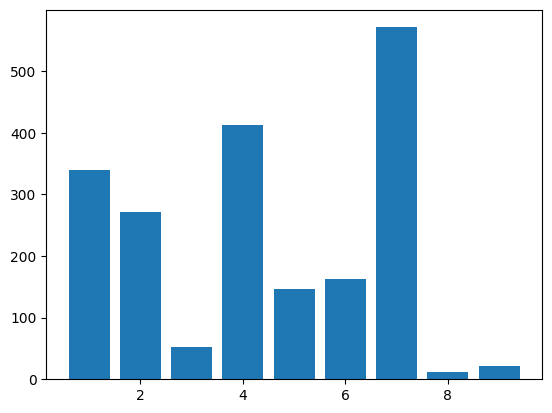

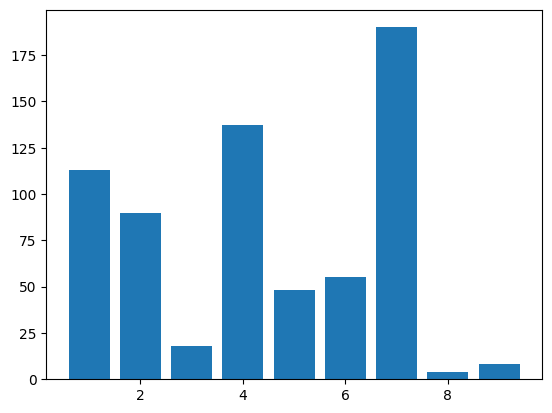

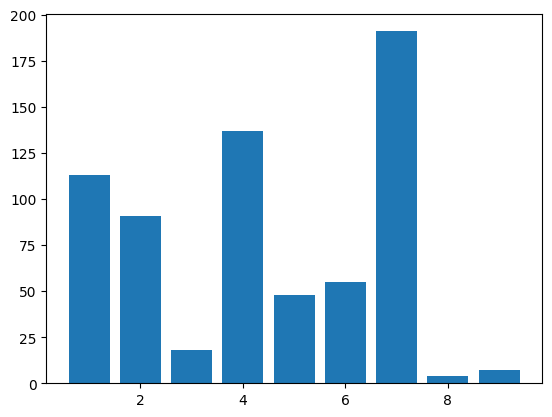

In [252]:
import matplotlib.pyplot as plt
counts=train_df['Class'].value_counts()
counts_cv=train_cv['Class'].value_counts()
counts_test=X_test['Class'].value_counts()

plt.bar(counts.index,counts.values)
plt.show()
plt.bar(counts_cv.index,counts_cv.values)
plt.show()
plt.bar(counts_test.index,counts_test.values)

plt.show()

# Build the random model

In [253]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def cm(test_y,test_pred):
  cm=confusion_matrix(test_y,test_pred)
  disp=ConfusionMatrixDisplay(cm,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()
  A=((cm.T)/((cm.sum(axis=1)).T))
  B=(cm/cm.sum(axis=0))
  disp=ConfusionMatrixDisplay(A,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()
  disp=ConfusionMatrixDisplay(B,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()

In [254]:
import numpy as np
np.random.rand(1,9)/np.sum(np.random.rand(1,9)[0])

array([[0.08395363, 0.00933902, 0.1546644 , 0.0981324 , 0.04923053,
        0.06372432, 0.1187595 , 0.03984216, 0.14560036]])

In [255]:
from sklearn.metrics import log_loss
test_data_len=X_test.shape[0]
cv_data_len=train_cv.shape[0]
cv_prd=np.zeros((cv_data_len,9))
for i in range(cv_data_len):
  prob=np.random.rand(1,9)
  cv_prd[i]=((prob/(np.sum(prob)))[0])
print("Random model logloss for validatio set is "),+ log_loss(y_cv,cv_prd,eps=1e-15)

Random model logloss for validatio set is 


(None, 2.4390860145765356)

In [256]:

test_prd=np.zeros((test_data_len,9))
for i in range(test_data_len):
  prob_test=np.random.rand(1,9)
  test_prd[i]=((prob_test/(np.sum(prob_test)))[0])
print("Random model logloss for validatio set is "),+ log_loss(Y_test,test_prd,eps=1e-15)

Random model logloss for validatio set is 


(None, 2.4491327745957787)

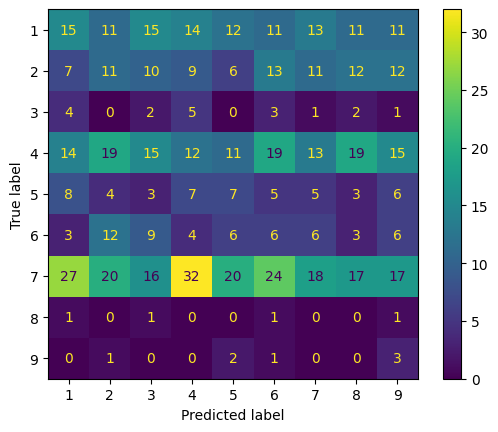

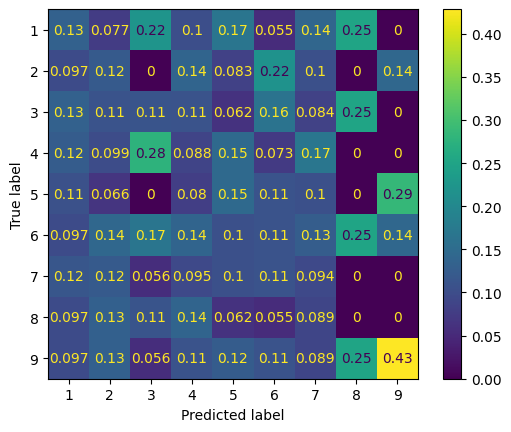

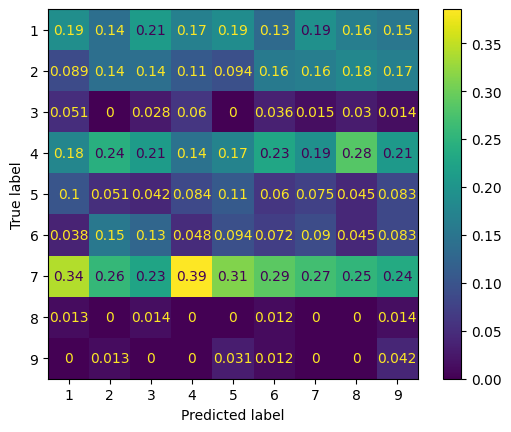

In [257]:
y_predicted=np.argmax(test_prd,axis=1)
cm(Y_test,y_predicted+1)

# Univar analysis

In [258]:
gene_feat= train_df['Gene'].value_counts()
print('gene total no.=',gene_feat.shape[0])
print('count of each of it is =')
gene_feat.head(10)

gene total no.= 215
count of each of it is =


BRCA1     146
TP53       96
EGFR       87
PTEN       85
BRCA2      68
KIT        65
BRAF       51
ERBB2      43
ALK        42
PIK3CA     38
Name: Gene, dtype: int64

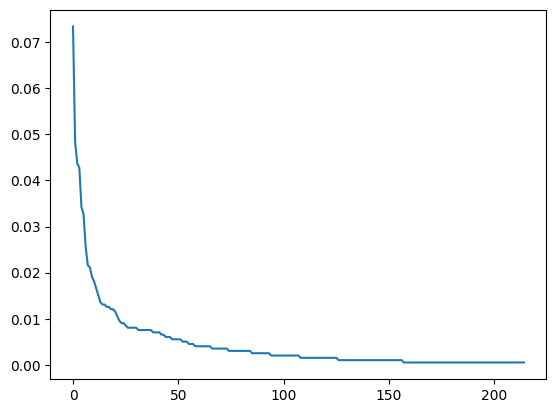

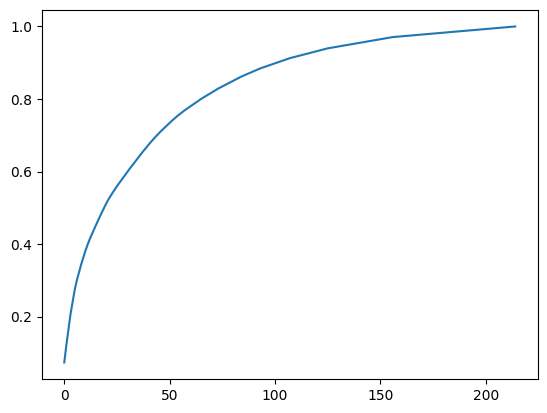

In [259]:
s=sum(gene_feat.values)
h=gene_feat.values/s
plt.plot(h)
plt.show()
c=np.cumsum(h)
plt.plot(c)
plt.show()

In [260]:
sum(gene_feat.values)

1989

# Univar Variation analysis

In [261]:
unique_var=train_df['Variation'].value_counts()
print('unique variation count is', unique_var.shape[0])

unique variation count is 1808


In [262]:
unique_var

Truncating Mutations    58
Deletion                47
Amplification           40
Fusions                 21
G12V                     3
                        ..
ESR1-CCDC170 Fusion      1
D84H                     1
R248Q                    1
D816F                    1
F893L                    1
Name: Variation, Length: 1808, dtype: int64

In [263]:
train_df.shape

(1989, 5)

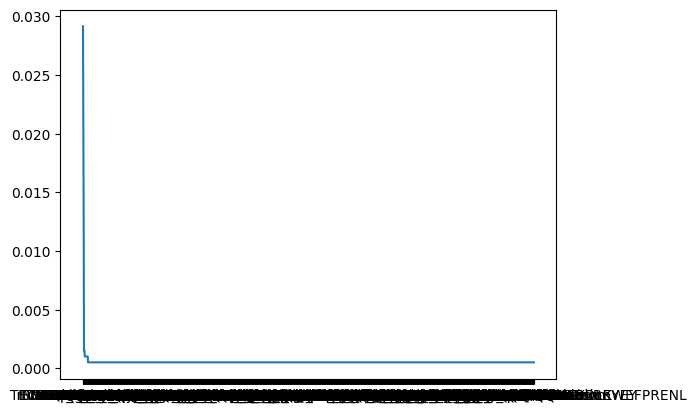

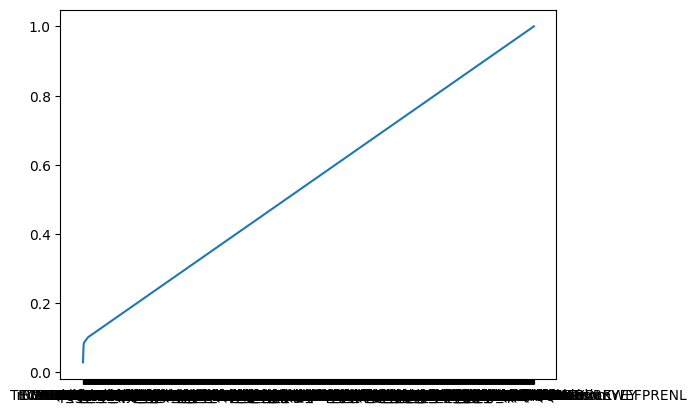

In [264]:
s= sum(unique_var.values)
h=unique_var/s
plt.plot(h)
plt.show()
c=np.cumsum(h)
plt.plot(c)
plt.show()

# Building model for gene and variation for feature

In [265]:
data.loc[(data['Class']==1)&(data['Gene']=='BRCA1')].shape

(60, 5)

In [266]:
#train_df.loc[(train_df['Class']==1)& (train_df['Gene']=='BRCA1')].shape[0]

"""a=train_df['Gene'].value_counts().items()
for i,b in a:
  print(b)"""


def response_coding_dict(alpha,feature,data):
  feature_dict=dict()
  for i, j in data[feature].value_counts().items():
    vec_prob=[]
    for k in range(1,10):
      class_locate= data.loc[(data['Class']==k)&(data[feature]==i)]
      vec_prob.append((class_locate.shape[0] + 10*alpha)/ (j + 90 * alpha))
    feature_dict[i]=vec_prob
  return feature_dict
def response_coding(alpha,feature,data):
  response_dict=response_coding_dict(alpha,feature,data)
  dict_to_compare=data[feature].value_counts()
  response_coded=[]
  for _, row in data.iterrows():
    if row[feature] in dict(dict_to_compare).keys():
      response_coded.append(response_dict[row[feature]])
    else:
      response_coded.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
  return response_coded

In [267]:
training_response_coded_gene= np.array(response_coding(1,"Gene",train_df))
val_response_coded_gene=np.array(response_coding(1,"Gene",train_cv))
test_response_coded_gene=np.array(response_coding(1,"Gene",X_test))

In [268]:
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.calibration import CalibratedClassifierCV as cc
from sklearn.metrics import log_loss
alpha =[10**x for x in range(-5,1)]
log_error=[]
for i in alpha:
  model=sgd(alpha=1,penalty='l2',loss='log_loss')
  model.fit(training_response_coded,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(training_response_coded,y_train)
  predict_y=model_cc.predict_proba(val_response_coded)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))


In [269]:

best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty='l2',loss='log_loss')
model.fit(training_response_coded,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(training_response_coded,y_train)
predict_y=model_cc.predict_proba(training_response_coded)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(val_response_coded)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(test_response_coded)
print("for best alpha logloss is ",log_loss(Y_test,predict_y,labels=model.classes_))

for best alpha logloss is  1.827204084300337
for best alpha logloss is  1.837601493601042
for best alpha logloss is  1.831531029013002


In [270]:
training_response_coded_var= np.array(response_coding(1,"Variation",train_df))
val_response_coded_var=np.array(response_coding(1,"Variation",train_cv))
test_response_coded_var=np.array(response_coding(1,"Variation",X_test))

In [271]:
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.calibration import CalibratedClassifierCV as cc
from sklearn.metrics import log_loss
alpha =[10**x for x in range(-5,1)]
log_error=[]
for i in alpha:
  model=sgd(alpha=1,penalty='l2',loss='log_loss')
  model.fit(training_response_coded,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(training_response_coded,y_train)
  predict_y=model_cc.predict_proba(val_response_coded)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))


In [272]:
best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty='l2',loss='log_loss')
model.fit(training_response_coded,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(training_response_coded,y_train)
predict_y=model_cc.predict_proba(training_response_coded)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(val_response_coded)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(test_response_coded)
print("for best alpha logloss is ",log_loss(Y_test,predict_y,labels=model.classes_))

for best alpha logloss is  1.8272415382760454
for best alpha logloss is  1.8374090771678642
for best alpha logloss is  1.8315336562833016


# Text preprocessing

In [273]:
"""training_response_coded_text= np.array(response_coding(1,"TEXT",train_df))
val_response_coded_text=np.array(response_coding(1,"TEXT",train_cv))
test_response_coded_text=np.array(response_coding(1,"TEXT",X_test))"""

'training_response_coded_text= np.array(response_coding(1,"TEXT",train_df))\nval_response_coded_text=np.array(response_coding(1,"TEXT",train_cv))\ntest_response_coded_text=np.array(response_coding(1,"TEXT",X_test))'

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
vectorizer=TfidfVectorizer(min_df=3)
tfidf_train=vectorizer.fit_transform(train_df['TEXT'])
tfidf_train=normalize(tfidf_train,axis=0)
tfidf_cv=vectorizer.transform(train_cv['TEXT'])
tfidf_cv=normalize(tfidf_cv,axis=0)
tfidf_test=vectorizer.transform(X_test['TEXT'])
tfidf_test=normalize(tfidf_test,axis=0)


'''

def term_freq(text):
  term_cnt=defaultdict(int)
  for i in text.split():
    term_cnt[i]+=1
  total_word=len(text.split())
  for i in term_cnt:
    term_cnt[i]=(term_cnt[i]/total_word)
  return term_cnt

def inverse_doc_freq(document):
  corpus_len=len(document)
  term_cnt=defaultdict(lambda: 0)
  for i in document:
    for j in set(i.split()):
      term_cnt[j]+=1
  for i,j in term_cnt.items():
    term_cnt[i]=math.log(corpus_len/( j+1))
  return term_cnt

def tfidf(document):
  idf=inverse_doc_freq(document)
  tfidf_vec=[]
  for i in document:
    tf=term_freq(i)
    tfidf={}
    for i,j in tf.items():
      tfidf[i]=j*idf[i]
    tfidf_vec.append(tfidf)
  return tfidf_vec
  '''



'\n\ndef term_freq(text):\n  term_cnt=defaultdict(int)\n  for i in text.split():\n    term_cnt[i]+=1\n  total_word=len(text.split())\n  for i in term_cnt:\n    term_cnt[i]=(term_cnt[i]/total_word)\n  return term_cnt\n\ndef inverse_doc_freq(document):\n  corpus_len=len(document)\n  term_cnt=defaultdict(lambda: 0)\n  for i in document:\n    for j in set(i.split()):\n      term_cnt[j]+=1\n  for i,j in term_cnt.items():\n    term_cnt[i]=math.log(corpus_len/( j+1))\n  return term_cnt\n\ndef tfidf(document):\n  idf=inverse_doc_freq(document)\n  tfidf_vec=[]\n  for i in document:\n    tf=term_freq(i)\n    tfidf={}\n    for i,j in tf.items():\n      tfidf[i]=j*idf[i]\n    tfidf_vec.append(tfidf)\n  return tfidf_vec\n  '

In [275]:
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.calibration import CalibratedClassifierCV as cc
from sklearn.metrics import log_loss
alpha =[10**x for x in range(-5,1)]
log_error=[]
for i in alpha:
  model=sgd(alpha=1,penalty='l2',loss='log_loss')
  model.fit(tfidf_train,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(tfidf_train,y_train)
  predict_y=model_cc.predict_proba(tfidf_cv)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))
best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty='l2',loss='log_loss')
model.fit(tfidf_train,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(tfidf_train,y_train)
predict_y=model_cc.predict_proba(tfidf_train)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(tfidf_cv)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(tfidf_test)
print("for best alpha logloss is ",log_loss(Y_test,predict_y,labels=model.classes_))

for best alpha logloss is  1.391562793922872
for best alpha logloss is  1.5742964019856456
for best alpha logloss is  1.5804053025125047


# Stacking the features

# Building a baseline model

In [276]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

"""training_response_coded_gene=csr_matrix(training_response_coded_gene.reshape(-1, 1))
training_response_coded_var=csr_matrix(training_response_coded_var.reshape(-1, 1))
"""
gene_var_train=np.hstack((training_response_coded_gene,training_response_coded_var))
print
Xtrain=hstack((tfidf_train,gene_var_train))
y_train=np.array(list(train_df['Class']))

gene_var_cv= np.hstack((val_response_coded_gene,val_response_coded_var))
Xcv= hstack((tfidf_cv,gene_var_cv))
y_cv=np.array(list(train_cv['Class']))

gene_var_test= np.hstack((test_response_coded_gene,test_response_coded_var))
Xtest= hstack((tfidf_test,gene_var_test))
y_test=np.array(list(X_test['Class']))


In [286]:
from sklearn.naive_bayes import MultinomialNB
alpha =[10**x for x in range(-5,4)]
log_error=[]
for i in alpha:
  model=MultinomialNB(alpha=i)
  model.fit(Xtrain,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(Xtrain,y_train)
  predict_y=model_cc.predict_proba(Xcv)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))
best_alpha=np.min(log_error)
model=MultinomialNB(alpha=best_alpha)
model.fit(Xtrain,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(Xtrain,y_train)
predict_y=model_cc.predict_proba(Xtrain)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(Xcv)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(Xtest)
print("for best alpha logloss is ",log_loss(y_test,predict_y,labels=model.classes_))

for best alpha logloss is  0.9133118400595338
for best alpha logloss is  1.3128602657782156
for best alpha logloss is  1.2801440284848289
